# YELP REVIEWS

# Context

As a way to measure the quality of food in the restaurants of the ten different districts of San Francisco with other metrics we chose to analyze the resturaunt feedback of people in each of these districts. 

For this analysis, we chose the Yelp Review Dataset to perform a qualitative analysis of the reviews of each district in San Francisco. We chose to analyze the reviews of the restaurants because they collectively provide evidence to what people think of the food, if they are happy with it or if they do not like the place. The reviews from each district were collected using the Yelp Fusion API.

Yelp:

Yelp is an American multinational corporation headquartered in San Francisco, California. It develops, hosts and markets Yelp.com and the Yelp mobile app, which publish crowd-sourced reviews about local businesses, as well as the online reservation service Yelp Reservations. The company also trains small businesses in how to respond to reviews, hosts social events for reviewers, and provides data about businesses, including health inspection scores.

source: Wikipedia

YELP API:

The Yelp Fusion API allows you to get the best local content and user reviews from millions of businesses across 32 countries. This tutorial provides an overview of the capabilities our suite of APIs offer, provides instructions for how to authenticate API calls, and walks through a simple scenario using the API.

source: https://www.yelp.com/developers/documentation/v3/get_started

The two endpoints used in this project are :

1) /businesses/{id} - This endpoint returns detailed business content. Normally, you would get the Business ID from   /businesses/search, /businesses/search/phone, /transactions/{transaction_type}/search or /autocomplete. To retrieve review excerpts for a business, please refer to our Reviews endpoint (/businesses/{id}/reviews)

2) /businesses/{id}/reviews - This endpoint returns up to three review excerpts for a given business ordered by Yelp's default sort order

# Methodology

For this analysis, we took Yelp Business API and joined it with the Yelp Reviews API to get the reviews of 50 restaurants of each zip code that falls in that district. Therefore, each district's review analysis is based on 50 resturants of all the Zip codes that fall under it. 
The reviews are then put in a dataframe, after some text processing including removing stop words, and supplied to create word clouds. After generating word clouds, the corpus is then used to perform natural language processing using the NLTK library to  find the 30 highest frequency words and a frequency distribution of the most used 20 words. 
Based on this data, the most frequently used words of each district is used to find the general quality of the restaurants of these districts.

In [11]:
import requests
import json
import pandas as pd
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
api_key = 'qix_-d6s6a-OuxI1I8YSt-LvVHPuvmzg0DsBYFhdTq4Kpa82OcahY9f0nn_9FRt1kXlvyLuuE2mbTwVNieq7SKmCe5UO1i6Pn1PWkU31HLoFnLtxea-HSi28DraIXHYx'
headers = {'Authorization': 'Bearer %s' % api_key}

def request(Zip):    
    '''
    Function to make request to Yelp API with specific zip code.
    '''
    url = 'https://api.yelp.com/v3/businesses/search'
    params = {
            'location': Zip,
            'limit': '50',
            'catgeory' : 'Restaurants'
            }

    req = requests.get(url, params=params, headers=headers)
    parsed = json.loads(req.text)
    return parsed["businesses"] 
    
def analysis(SFZip):
    '''
    Function to combine review and business API and parse reviews to supply to futher analysis.
    '''
    df = pd.DataFrame()
 
    Reviews = []
    
    for i in SFZip:
        businesses = request(i)
        
        for business in businesses:
            zip = business["location"]["zip_code"]
            if zip == i:

                id = business["id"]

                url ="https://api.yelp.com/v3/businesses/" + id + "/reviews"
                req = requests.get(url, headers=headers)
                parsed = json.loads(req.text)

                reviews = parsed["reviews"]
                for review in reviews:
                    #print("Reviews:", review["text"] , "\n")
                    Reviews.append(review["text"]) 
                    break  
    return Reviews
     
def wordcloud(Reviews):
    '''
    Function to create wordclouds from reviews.
    '''
    plt.figure(figsize=(12,10))
    wordcloud = WordCloud(background_color='white', width=1200, stopwords = STOPWORDS, height=1000).generate(str(Reviews))
    plt.imshow(wordcloud)
    plt.axis('off');     


def freqAnalysis(resultText):
    '''
    Function to clean text and perform frequency distribution. 
    '''
    stopwords2 = ["the", "a", "and", "or", "in", "of", "to", "an", "said", "about", "on", "...", ",", "___", "s",
                 "The", "—", "``", "’", "'s", ":", "“", "About", ".", "are", "with", "14", "is", "that", "was", "at", 
                 "for", "he", "I", "not", "who", "will", "also", "says", "t", "from", "were", "has", "(", "But", "AM"
                 "'", "a.m.", "In", "@","$", "two", "like","make", "more", "She", "new", "could", "one", "it", "th", 
                  "p.m.", "told", "he", "would", "He", "A", "AP", "''", ")", "It", "say", '"', "!", "'m", "'ve", "This",
                 "&", "n't", "We", "They", "'re", "My", "get", "got", "go", "-", "since", "food", "place", "There"]

    #To remove digits for frequency analysis
    no_digits = []
    for i in resultText:
        if not i.isdigit():
            no_digits.append(i)

    resultText = ''.join(no_digits)

    stopwords = nltk.corpus.stopwords.words("english")
    words = nltk.word_tokenize(resultText)
    words = [w for w in words if w not in stopwords]
    words = [w for w in words if w not in stopwords2]
    fdist1 = FreqDist(words)

    #Most common wordss
    print("The top 30 most common words in the us-world category is:")
    fd_most_common = fdist1.most_common(30)
    print(fd_most_common)

    #PLOT
    fdist1.plot(20, cumulative=True)


### District 1: Market

In [48]:
df = pd.DataFrame()
api_key = 'qix_-d6s6a-OuxI1I8YSt-LvVHPuvmzg0DsBYFhdTq4Kpa82OcahY9f0nn_9FRt1kXlvyLuuE2mbTwVNieq7SKmCe5UO1i6Pn1PWkU31HLoFnLtxea-HSi28DraIXHYx'
headers = {'Authorization': 'Bearer %s' % api_key}
url = 'https://api.yelp.com/v3/businesses/search'
params = {
        'location': '94102',
        'limit': '50',
        'catgeory' : 'Restaurants'
        }

req = requests.get(url, params=params, headers=headers)
parsed = json.loads(req.text)
businesses = parsed["businesses"]  
     
Name = []
Rating = []
Zip = []
id = []
Districts = []
Reviews = []

for business in businesses:
    zip = business["location"]["zip_code"]
    if zip == "94102":
              
        Districts.append("Market");
        #print("Districts:", "Market")
        
        name = business["name"]
        #print("Name:", name)
        Name.append(name)
        
        #print("Zip Code:", zip)
        Zip.append(zip)

        rating = business["rating"]
        #print("Rating:", rating)
        Rating.append(rating)

        id = business["id"]

        url ="https://api.yelp.com/v3/businesses/" + id + "/reviews"
        req = requests.get(url, headers=headers)
        parsed = json.loads(req.text)

        reviews = parsed["reviews"]
        for review in reviews:
            #print("Reviews:", review["text"] , "\n")
            Reviews.append(review["text"]) 
            break  


url = 'https://api.yelp.com/v3/businesses/search'
params = {
        'location': '94103',
        'limit': '50',
        'catgeory' : 'Restaurants'
        }

req = requests.get(url, params=params, headers=headers)
parsed = json.loads(req.text)
businesses = parsed["businesses"]  

for business in businesses:
    zip = business["location"]["zip_code"]
    if zip == "94103":
              
        Districts.append("Market");
        #print("Districts:", "Market")
        
        name = business["name"]
        #print("Name:", name)
        Name.append(name)
        
        #print("Zip Code:", zip)
        Zip.append(zip)

        rating = business["rating"]
        #print("Rating:", rating)
        Rating.append(rating)

        id = business["id"]

        url ="https://api.yelp.com/v3/businesses/" + id + "/reviews"
        req = requests.get(url, headers=headers)
        parsed = json.loads(req.text)

        reviews = parsed["reviews"]
        for review in reviews:
            #print("Reviews:", review["text"] , "\n")
            Reviews.append(review["text"]) 
            break  
    
df.insert(0, "Name", Name)
df.insert(1, "Rating", Rating)
df.insert(2, "Zip", Zip)
df.insert(3, "Review", Reviews)
df


,Name,Rating,Zip,Review
0,Brenda's French Soul Food,4.0,94102,Two strangers recommended this place (1 LAX ts...
1,Saigon Sandwich,4.5,94102,The O.G.\n\nIs San Francisco expensive? Does i...
2,Absinthe Brasserie & Bar,4.0,94102,3.75/5\nCame by on a Sunday morning for brunch...
3,Blue Bottle Coffee,4.5,94102,I stopped here after an early morning walk on ...
4,Asian Art Museum,4.5,94102,The Asian Art museum has a fantastic collectio...
5,Espetus Brazilian Steak House,4.0,94102,"I have to say, out of the three Brazilian Stea..."
6,The Chairman Truck,4.0,94102,The Chairman comes to OTG El Cerrito every oth...
7,Suppenküche,4.0,94102,"After a 10+ year haitus, I've been to Suppenku..."
8,Smitten Ice Cream,4.0,94102,BEST ICE CREAM IN SF!\n\nOk I have a BIG thing...
9,Chantal Guillon Macarons,4.5,94102,One of my favorite macaron shops!\n\n1. They h...


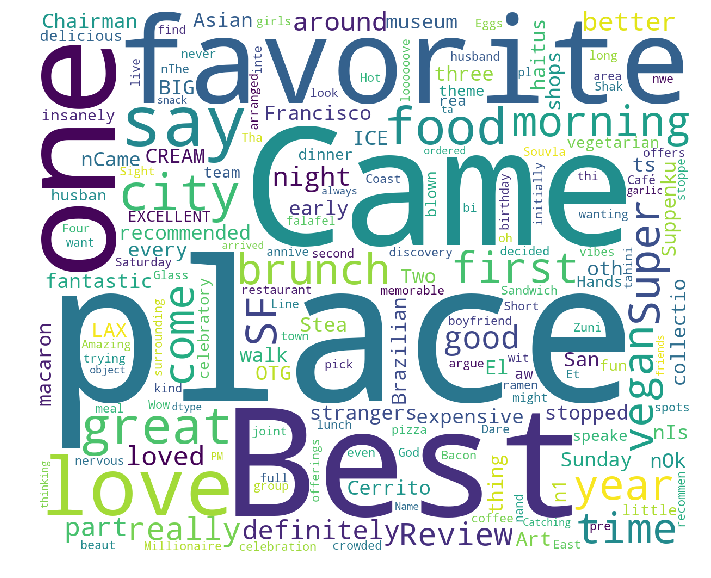

In [49]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white', width=1200, stopwords = STOPWORDS, height=1000).generate(str(df["Review"]))
plt.imshow(wordcloud)
plt.axis('off');

The top 30 most common words in the us-world category is:
[('time', 9), ('love', 8), ('good', 7), ('Came', 5), ('brunch', 5), ('favorite', 5), ('definitely', 5), ('best', 4), ('ever', 4), ('spicy', 4), ('great', 4), ('always', 4), ('city', 4), ('Sunday', 3), ('morning', 3), ('away', 3), ('table', 3), ('part', 3), ('little', 3), ('side', 3), ('street', 3), ('meal', 3), ('every', 3), ('chicken', 3), ('find', 3), ('vegan', 3), ('want', 3), ('restaurant', 3), ('menu', 3), ('came', 3)]


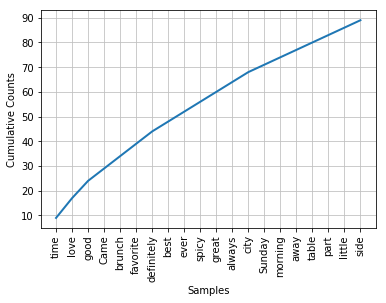

In [52]:
resultText = df["Review"]
stopwords2 = ["the", "a", "and", "or", "in", "of", "to", "an", "said", "about", "on", "...", ",", "___", "s",
             "The", "—", "``", "’", "'s", ":", "“", "About", ".", "are", "with", "14", "is", "that", "was", "at", 
             "for", "he", "I", "not", "who", "will", "also", "says", "t", "from", "were", "has", "(", "But", "AM"
             "'", "a.m.", "In", "@","$", "two", "like","make", "more", "She", "new", "could", "one", "it", "th", 
              "p.m.", "told", "he", "would", "He", "A", "AP", "''", ")", "It", "say", '"', "!", "'m", "'ve", "This",
             "&", "n't", "We", "They", "'re", "My", "get", "got", "go", "-", "There", "SF", "food", "place", "around",
             "!", "'m", "'ve", "This","&", "n't", "We", "They", "'re", "My", "get", "got", "go", "-", "?"]

#To remove digits for frequency analysis
no_digits = []
for i in resultText:
    if not i.isdigit():
        no_digits.append(i)

resultText = ''.join(no_digits)

stopwords = nltk.corpus.stopwords.words("english")
words = nltk.word_tokenize(resultText)
words = [w for w in words if w not in stopwords]
words = [w for w in words if w not in stopwords2]
fdist1 = FreqDist(words)

#Most common wordss
print("The top 30 most common words in the us-world category is:")
fd_most_common = fdist1.most_common(30)
print(fd_most_common)

#PLOT
fdist1.plot(20, cumulative=True)

### District 2: Richmond

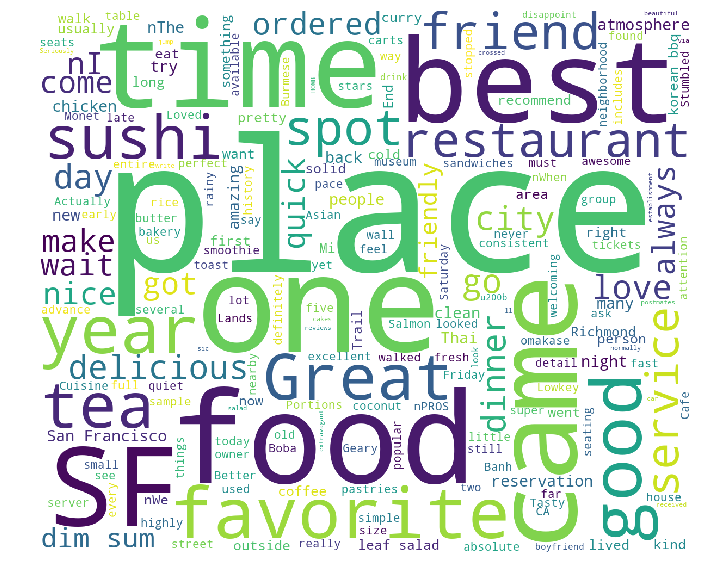

In [33]:
SFZip = ['94118', '94121']
Reviews = analysis(SFZip)
wordcloud(Reviews)

The top 30 most common words in the us-world category is:
[('best', 9), ('favorite', 9), ('SF', 8), ('tea', 7), ('good', 7), ('time', 7), ('years', 6), ('came', 6), ('dinner', 6), ('spot', 6), ('service', 5), ('delicious', 5), ('always', 5), ('city', 5), ('wait', 5), ('dim', 5), ('sum', 5), ('nice', 5), ('restaurant', 5), ('There', 5), ('salad', 4), ('times', 4), ('people', 4), ('Great', 4), ('amazing', 4), ('day', 4), ('try', 4), ('many', 4), ('San', 4), ('Francisco', 4)]


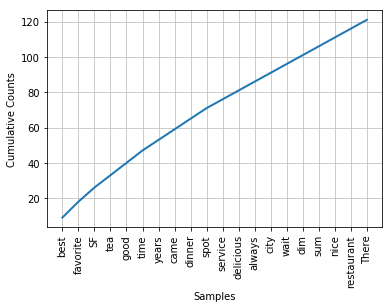

In [36]:
freqAnalysis(Reviews)

### District 3: Marina

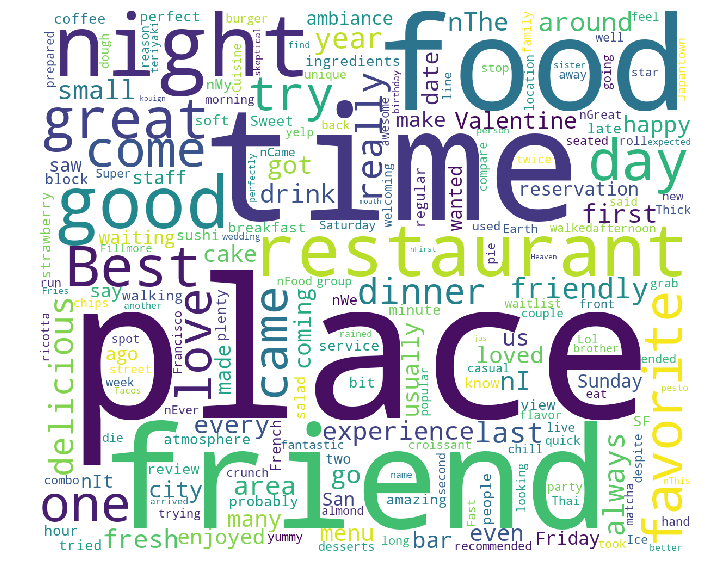

In [37]:
SFZip = ['94115', '94123']
Reviews = analysis(SFZip)
wordcloud(Reviews)

The top 30 most common words in the us-world category is:
[('place', 6), ('ordered', 3), ('good', 3), ('shrimp', 3), ('grits', 3), ('pizza', 3), ('party', 2), ('really', 2), ('atmosphere', 2), ('ribs', 2), ('Good', 2), ('ambiance', 2), ('food', 2), ('Delicious', 2), ('beer', 2), ('Great', 2), ('boy', 2), ('come', 2), ('Radio', 2), ('Africa', 2), ('Kitchen', 2), ('ate', 2), ('chicken', 2), ('And', 2), ('sat', 2), ('three', 1), ('females', 1), ('nice', 1), ('20', 1), ('30', 1)]


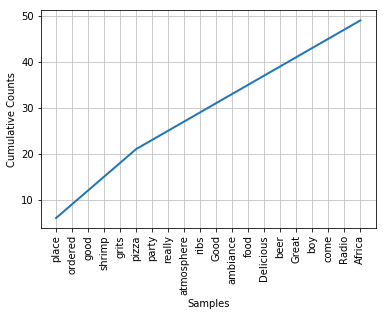

In [45]:
freqAnalysis(Reviews)

### District 4: Nob Hill

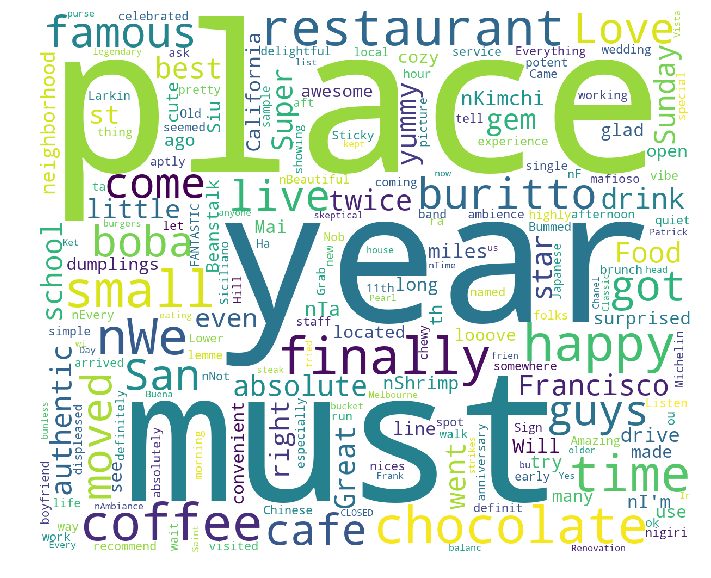

In [55]:
SFZip = ['94108', '94133', '94109']
Reviews = analysis(SFZip)
wordcloud(Reviews)

The top 30 most common words in the us-world category is:
[('place', 86), ('food', 46), ('good', 33), ('service', 26), ('time', 24), ('love', 24), ('restaurant', 22), ('wait', 19), ('best', 19), ('great', 18), ('really', 18), ('line', 17), ('SF', 17), ('delicious', 16), ('years', 15), ('You', 15), ('experience', 15), ('came', 15), ('Great', 15), ('dinner', 15), ('long', 14), ('try', 14), ('San', 14), ('Francisco', 14), ('pretty', 14), ('Italian', 14), ('friend', 14), ('fresh', 13), ('?', 13), ('little', 13)]


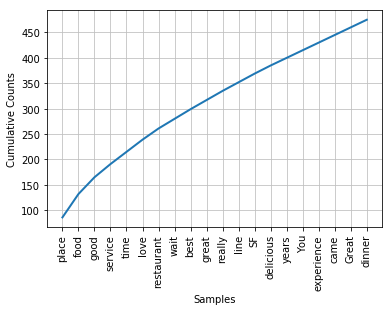

In [56]:
freqAnalysis(Reviews)

### District 5: Sunset

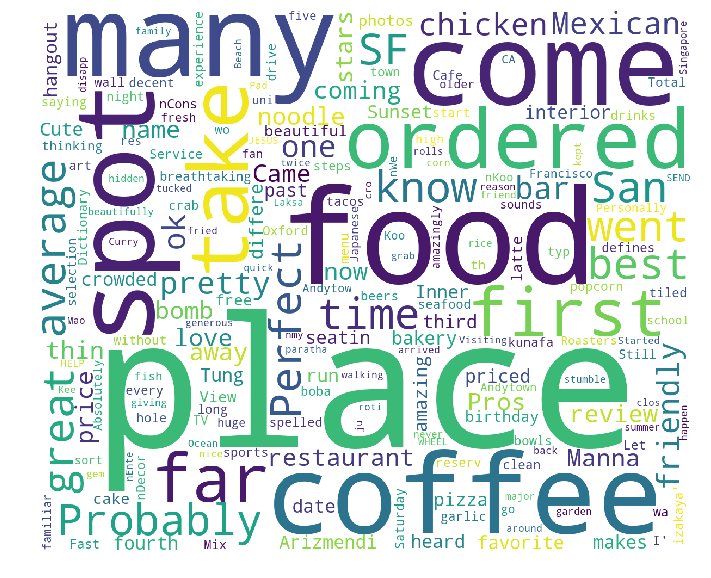

In [32]:
SFZip = ['94122']
Reviews = analysis(SFZip)
wordcloud(Reviews)

The top 30 most common words in the us-world category is:
[('good', 10), ('time', 9), ('night', 9), ('try', 7), ('dinner', 7), ('restaurant', 7), ('come', 7), ('friendly', 6), ('friend', 6), ('favorite', 6), ('Great', 6), ('always', 6), ('great', 5), ('around', 5), ('experience', 5), ('day', 5), ('Came', 5), ('delicious', 5), ('friends', 5), ('really', 5), ('area', 4), ('us', 4), ('Best', 4), ('menu', 4), ('years', 4), ('came', 4), ('many', 4), ('last', 4), ('first', 4), ('date', 4)]


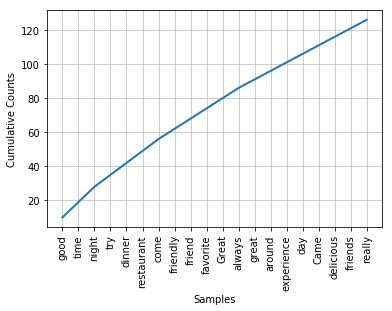

In [38]:
freqAnalysis(Reviews)

### District 6: Haight

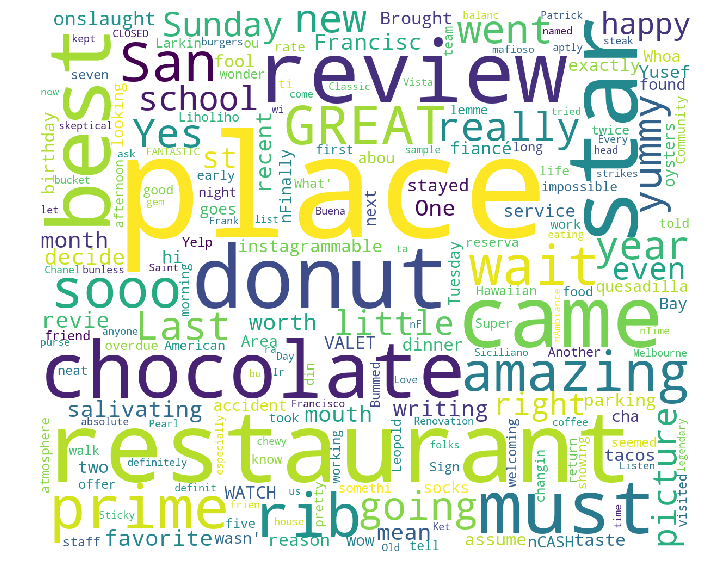

In [34]:
SFZip = ['94117', '94133', '94109']
Reviews = analysis(SFZip)
wordcloud(Reviews)

The top 30 most common words in the us-world category is:
[('good', 10), ('time', 9), ('night', 9), ('try', 7), ('dinner', 7), ('restaurant', 7), ('come', 7), ('friendly', 6), ('friend', 6), ('favorite', 6), ('Great', 6), ('always', 6), ('great', 5), ('around', 5), ('experience', 5), ('day', 5), ('Came', 5), ('delicious', 5), ('friends', 5), ('really', 5), ('area', 4), ('us', 4), ('Best', 4), ('menu', 4), ('years', 4), ('came', 4), ('many', 4), ('last', 4), ('first', 4), ('date', 4)]


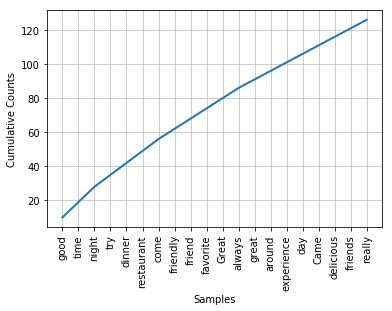

In [39]:
freqAnalysis(Reviews)

### District 7: Twin Peaks

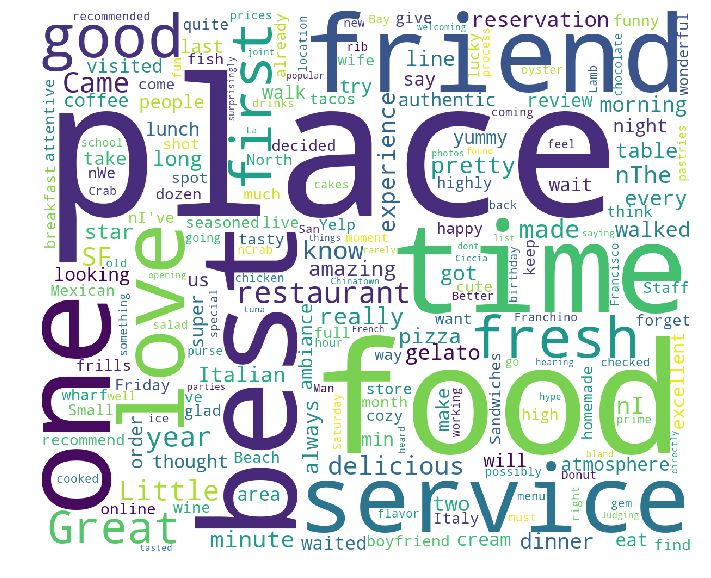

In [40]:
SFZip = ['94131', '94133', '94109']
Reviews = analysis(SFZip)
wordcloud(Reviews)

The top 30 most common words in the us-world category is:
[('best', 10), ('good', 9), ('service', 9), ('time', 8), ('fresh', 8), ('love', 8), ('friend', 7), ('made', 6), ('first', 6), ('SF', 6), ('5', 6), ('restaurant', 6), ('know', 5), ('Came', 5), ('pretty', 5), ('delicious', 5), ('really', 5), ('year', 5), ('long', 4), ('Little', 4), ('walked', 4), ('morning', 4), ('line', 4), ('ever', 4), ('reservation', 4), ('10', 4), ('experience', 4), ('every', 4), ('Great', 4), ('great', 4)]


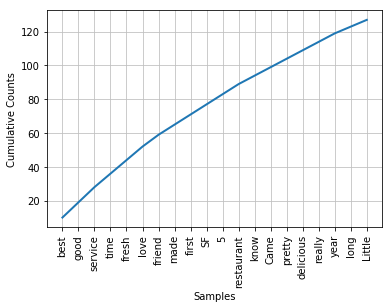

In [41]:
freqAnalysis(Reviews)

### District 8: Castro

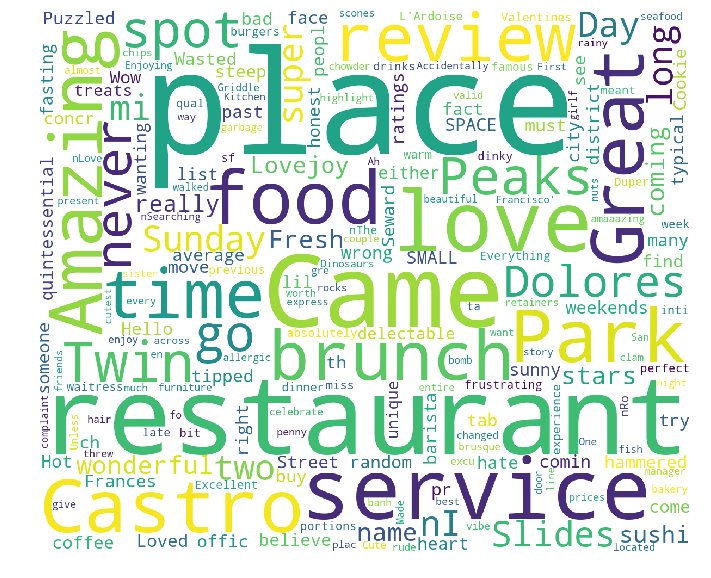

In [38]:
SFZip = ['94114', '94133', '94109']
Reviews = analysis(SFZip)
wordcloud(Reviews)

The top 30 most common words in the us-world category is:
[('place', 6), ('ordered', 3), ('good', 3), ('shrimp', 3), ('grits', 3), ('pizza', 3), ('party', 2), ('really', 2), ('atmosphere', 2), ('ribs', 2), ('Good', 2), ('ambiance', 2), ('food', 2), ('Delicious', 2), ('beer', 2), ('Great', 2), ('boy', 2), ('come', 2), ('Radio', 2), ('Africa', 2), ('Kitchen', 2), ('ate', 2), ('chicken', 2), ('And', 2), ('sat', 2), ('three', 1), ('females', 1), ('nice', 1), ('20', 1), ('30', 1)]


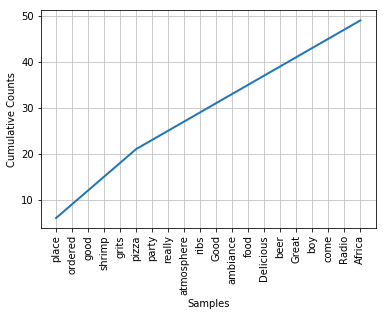

In [46]:
freqAnalysis(Reviews)

### District 9: Mission

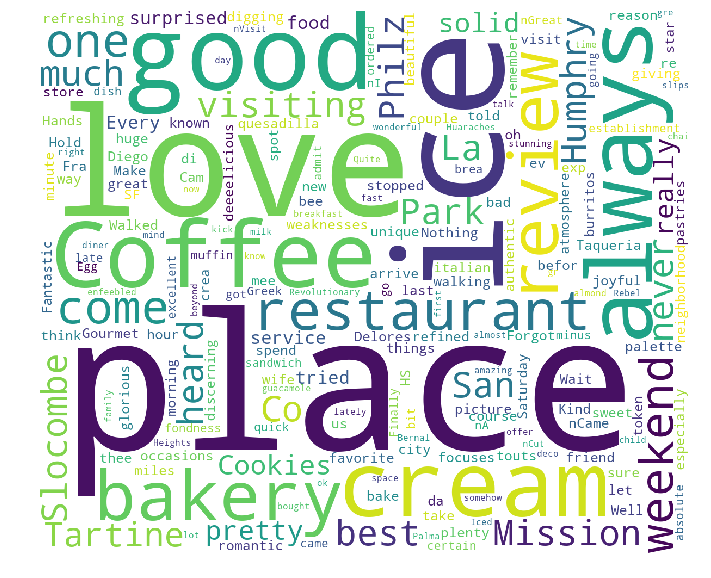

In [40]:
SFZip = ['94158', '94110']
Reviews = analysis(SFZip)
wordcloud(Reviews)

The top 30 most common words in the us-world category is:
[('place', 6), ('ordered', 3), ('good', 3), ('shrimp', 3), ('grits', 3), ('pizza', 3), ('party', 2), ('really', 2), ('atmosphere', 2), ('ribs', 2), ('Good', 2), ('ambiance', 2), ('food', 2), ('Delicious', 2), ('beer', 2), ('Great', 2), ('boy', 2), ('come', 2), ('Radio', 2), ('Africa', 2), ('Kitchen', 2), ('ate', 2), ('chicken', 2), ('And', 2), ('sat', 2), ('three', 1), ('females', 1), ('nice', 1), ('20', 1), ('30', 1)]


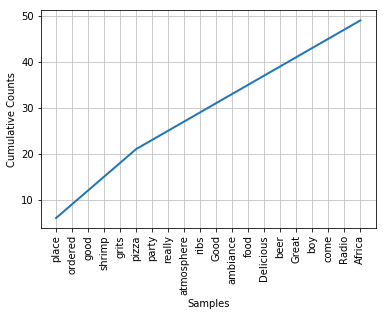

In [47]:
freqAnalysis(Reviews)

### District 10: Portola

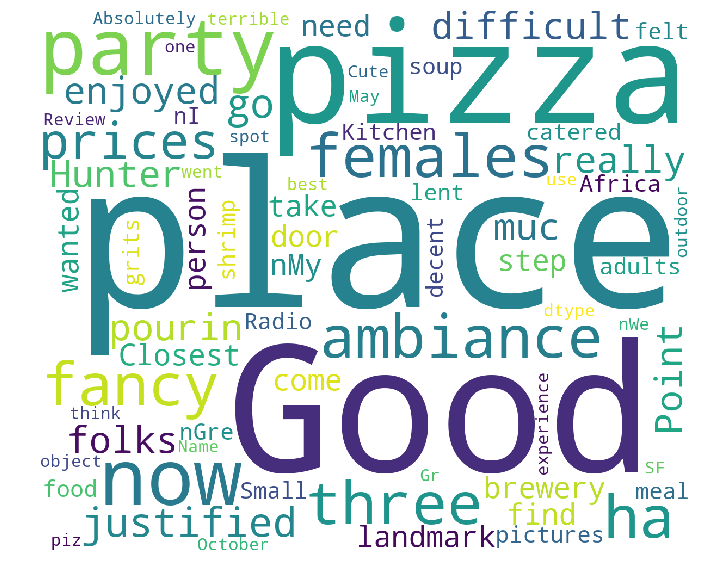

In [42]:
SFZip = ['94134', '94124']
Reviews = analysis(SFZip)
wordcloud(Reviews)

The top 30 most common words in the us-world category is:
[('place', 19), ('food', 9), ('time', 9), ('love', 8), ('good', 7), ('SF', 7), ('Came', 5), ('brunch', 5), ('favorite', 5), ('definitely', 5), ('There', 4), ('best', 4), ('ever', 4), ('spicy', 4), ('great', 4), ('always', 4), ('city', 4), ('around', 4), ('Sunday', 3), ('morning', 3), ('away', 3), ('table', 3), ('part', 3), ('little', 3), ('side', 3), ('street', 3), ('meal', 3), ('every', 3), ('chicken', 3), ('find', 3)]


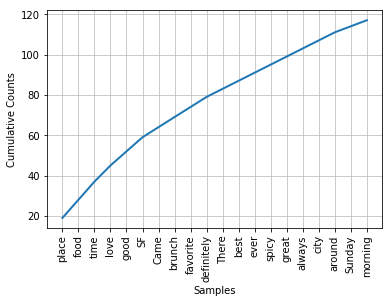

In [51]:
freqAnalysis(Reviews)

# Observations and Comments

From these graphs, charts and word clouds for the restaurants of the ten districts of San Francisco we can draw a few conclusions about the quality of food in each of these districts based on the Yelp reviews. I have provided a district by district analysis of the most frequently appearing words in each of 50 restaurants in each district. 

The analysis was performed using techniques taught in class. I created frequency distributions and word counts and manually analyzed them. There were some ambiguities as it is not always obvious what the connotations of certain words are. Some words could have either been positive or negative. In terms of deciding if a word is postive or negative, I did research on positive words from reviews and these are some of the words that indicate positivity in reviews[ delicious, great, amazing, excellent, good, best, awesome, perfect, love, friendly, stars, nice, fantastic, tasty, loved, favorite, yummy, bit, wonderful, definitely]. The negative words were words such as [never, bad, unhealthy, poisonous, hazardous, rotten, close, not].
Also it should be noted that only 50 restaurants from each zip code were used for this analysis.

Here are some observations that can be drawn from each of the districts based on the analysis. 
The ten disticts are Market, Richmond, Marina, Nob Hill, Sunset, Haight, Twin Peaks, Castro, Mission and Portola.

For district market, we can see most common words such as "Favourite", "loooove", "always", "best time ever". Most of the words are positive. There are some negative words such as "nervous", "never" and "crowded". 

For district Richmond we can see most common words such as "good", "live", "best", "pretty" and "delicious". Most of the words are positive. There are not as many occurances of negative words with high frequency or any words that stood out. 

For district Marina, the data was more sparse than the other districts as the Yelp Api did not pick as many restaurants for that particular zip code. We can see most common words out of the restaurants that were queried were "Ambiance" and "great". There were more non-descriptive words than adjectives for this district.

For district Nob Hill we can see most common words such as "Authentic", "good", "love", "service" and "really". Some words that occured frequently were a little ambiguous as "really", "long", "time", "late" and "good" were among the words that occured the most. This could either mean that the reviews meant really good or really long line and really late. This is ambiguous and the sentiment of the reviews could be either positive or negative. But looking at the word cloud and the general words, there were more positive words than negative words. The few negative words that stood out were "crowded", "closed and "late".

For district Sunset we can see most common words such as "delicious", "great" and"many". There seems to be an abundance of only positive words with the occurance of two negative words such as "never" and "long time". 

For district Haight we can see most common words such as "amazing", "must", "going", "service" and "recommend". Most of the words are positive. There are some negative words such as "last time" which is ambiguous because this could either be last time I came here or last time I am coming here. 

For district Twin Peaks had more negative words than postive words with some negative words really standing out such as "hazard", "long" and "never".

For district Castro we can see most common words such as "love" and the rest of the most occuring words were "rude", "fasting" and "wrong. 

For district Mission had similar positive words from other districts. The positive words really stood out with almost no negative words in the reviews.  

For district Portola also had sparse data compared to the other districts and the words that stood out were neutral and positive.

# Results

From this analysis, we can conclude that based on the reviews of each district of San Francisco, Sunset, Nob Hill and Mission stood out as the ones with the districts with the most positively worded reviews. Dictricts Twin Peaks, Market and Castro had the most negatively worded reviews. 

For further and more accurate analysis, I could have implemented NLP techniques such as word tagging and classification of positive and negative words. I could have also combined review data from other sources to account for people other than just yelp users. More data from each district would have provided a better picture.